# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'
city_url = url + '&q='+ 'Sacramento'
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -121.3177, 'lat': 38.4666},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 23.98,
  'feels_like': 23.58,
  'temp_min': 22.9,
  'temp_max': 25.34,
  'pressure': 1023,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 6.17, 'deg': 170},
 'clouds': {'all': 0},
 'dt': 1712097866,
 'sys': {'type': 2,
  'id': 2002655,
  'country': 'US',
  'sunrise': 1712065652,
  'sunset': 1712111364},
 'timezone': -25200,
 'id': 5389519,
 'name': 'Sacramento',
 'cod': 200}

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q='+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | quthing
Processing Record 6 of Set 1 | salinopolis
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | muurame
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | prince rupert
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | puerto baquerizo moreno
Processing Record 22 of Set 1 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-22.13,91,84,2.52,RU,1712098313
1,hithadhoo,-0.6000,73.0833,28.33,74,78,1.03,MV,1712098015
2,keflavik,64.0049,-22.5624,0.95,100,100,5.14,IS,1712098556
3,bilibino,68.0546,166.4372,-16.58,65,5,0.99,RU,1712098239
4,quthing,-30.4000,27.7003,14.88,57,27,0.63,LS,1712098558


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-22.13,91,84,2.52,RU,1712098313
1,hithadhoo,-0.6000,73.0833,28.33,74,78,1.03,MV,1712098015
2,keflavik,64.0049,-22.5624,0.95,100,100,5.14,IS,1712098556
3,bilibino,68.0546,166.4372,-16.58,65,5,0.99,RU,1712098239
4,quthing,-30.4000,27.7003,14.88,57,27,0.63,LS,1712098558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

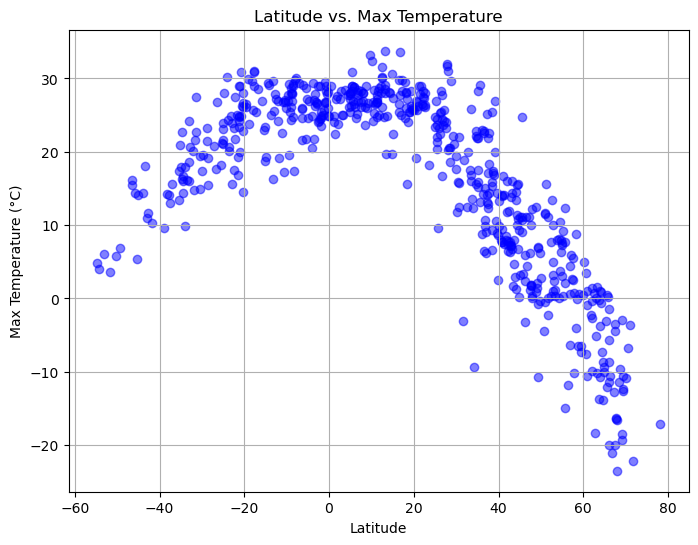

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.5)
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure (before calling plt.show())
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

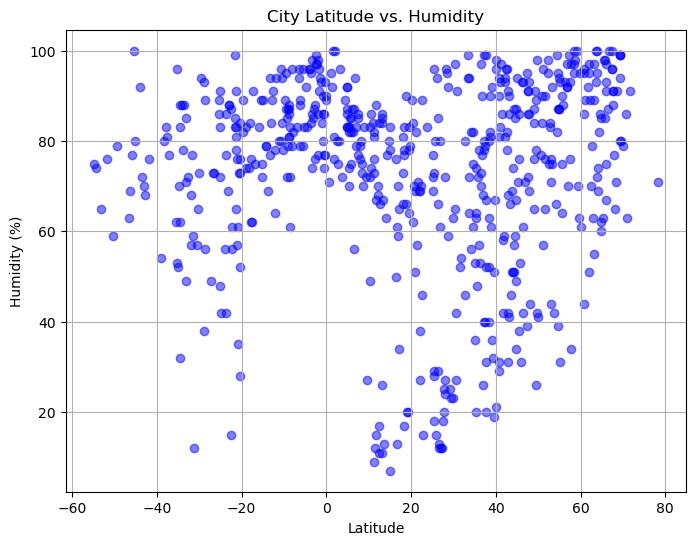

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

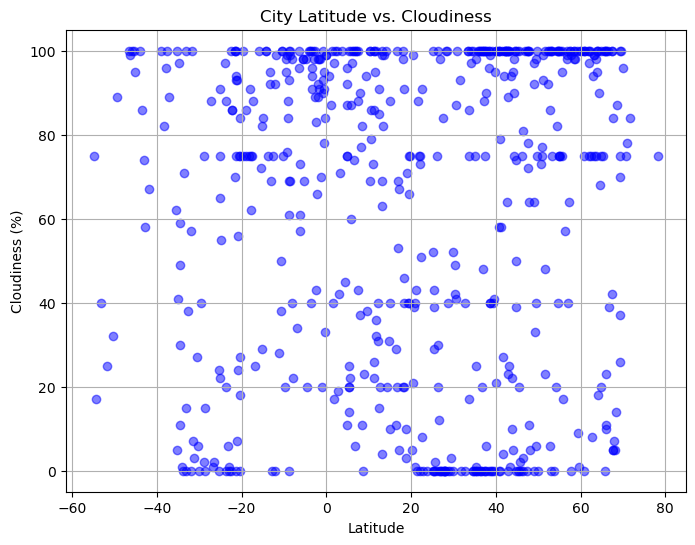

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

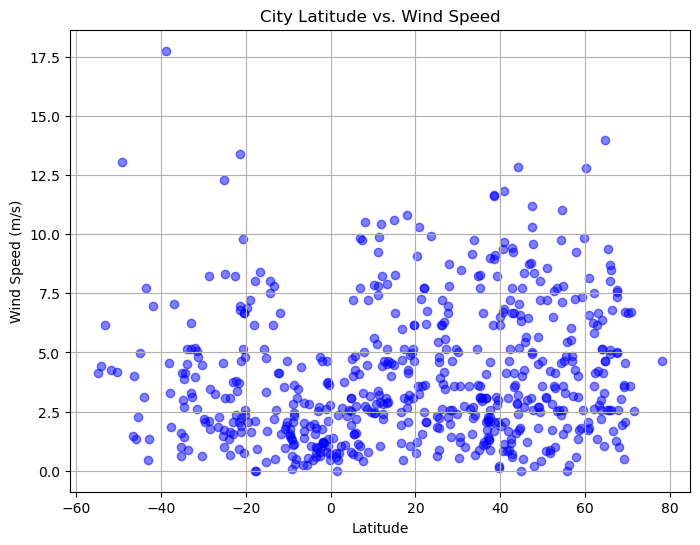

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [49]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-22.13,91,84,2.52,RU,1712098313
2,keflavik,64.0049,-22.5624,0.95,100,100,5.14,IS,1712098556
3,bilibino,68.0546,166.4372,-16.58,65,5,0.99,RU,1712098239
8,hasaki,35.7333,140.8333,13.22,72,100,2.96,JP,1712098310
9,georgetown,5.4112,100.3354,28.96,83,20,1.54,MY,1712098370


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,28.33,74,78,1.03,MV,1712098015
4,quthing,-30.4000,27.7003,14.88,57,27,0.63,LS,1712098558
5,salinopolis,-0.6136,-47.3561,26.82,86,91,3.76,BR,1712098338
6,port-aux-francais,-49.3500,70.2167,6.92,79,89,13.05,TF,1712098214
7,port macquarie,-31.4333,152.9167,22.72,59,7,5.05,AU,1712098560


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,28.33,74,78,1.03,MV,1712098015
4,quthing,-30.4000,27.7003,14.88,57,27,0.63,LS,1712098558
5,salinopolis,-0.6136,-47.3561,26.82,86,91,3.76,BR,1712098338
6,port-aux-francais,-49.3500,70.2167,6.92,79,89,13.05,TF,1712098214
7,port macquarie,-31.4333,152.9167,22.72,59,7,5.05,AU,1712098560


###  Temperature vs. Latitude Linear Regression Plot

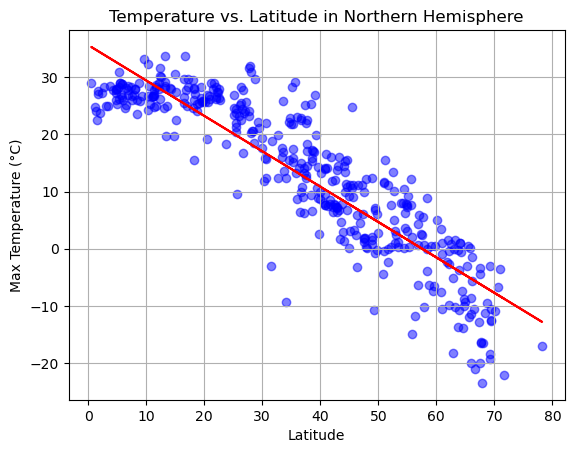

Equation of the linear regression line: y = -0.62x + 35.64
The r-value is: -0.8975095004850754


In [43]:
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Temperature vs. Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)

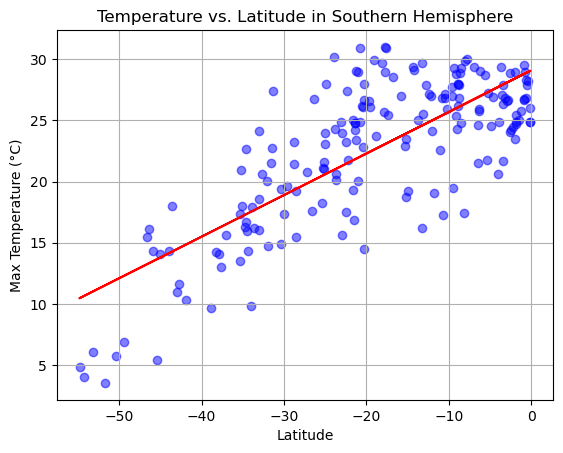

Equation of the linear regression line: y = 0.34x + 29.09
The r-value is: 0.769499733339691


In [40]:
# Linear regression on Southern Hemisphere
# Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Temperature vs. Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)

**Discussion about the linear relationship:** Linear regression was performed to assess the relationship between Temperature and Latitude in the Northern and Southern Hemisphere. As Latitude increases (moving away from the equator), Temperature tends to decrease in the Northern Hemisphere. For the Southern Hemisphere - the analysis showed a strong positive correlation between Temperature and Latitude => as Latitude increases (moving closer to the equator), Temperature tends to increase in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

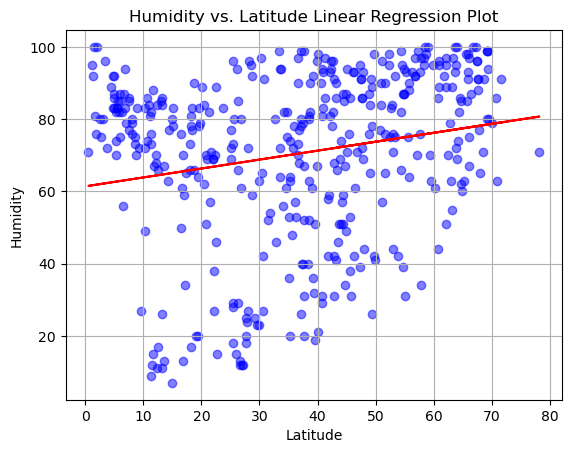

Equation of the linear regression line: y = 0.25x + 61.41
The r-value is: 0.20495323152268746


In [44]:
# Northern Hemisphere
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)

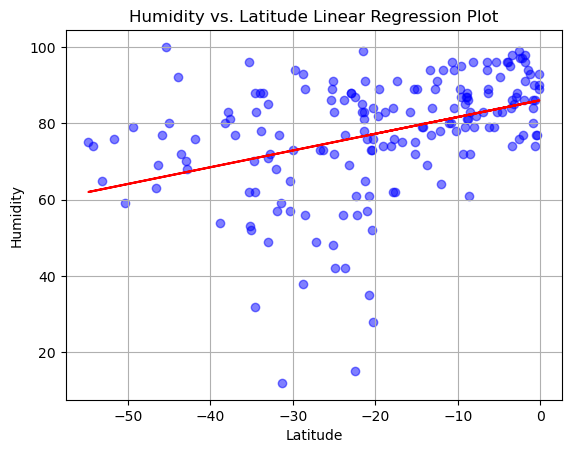

Equation of the linear regression line: y = 0.44x + 86.02
The r-value is: 0.38755839659714225


In [52]:
# Southern Hemisphere
# Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', alpha=0.5)

# Linear regression
#slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')
rvalue=linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
#slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, average_tumor_volume)
#regress_values = mouse_weight * slope + intercept


# Add labels and title
plt.title('Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)

**Discussion about the linear relationship:** While both hemispheres exhibit positive correlations between Humidity and Latitude, the strength of the relationships differs. The Northern Hemisphere shows a weaker correlation, while the Southern Hemisphere demonstrates a slightly stronger correlation.

### Cloudiness vs. Latitude Linear Regression Plot

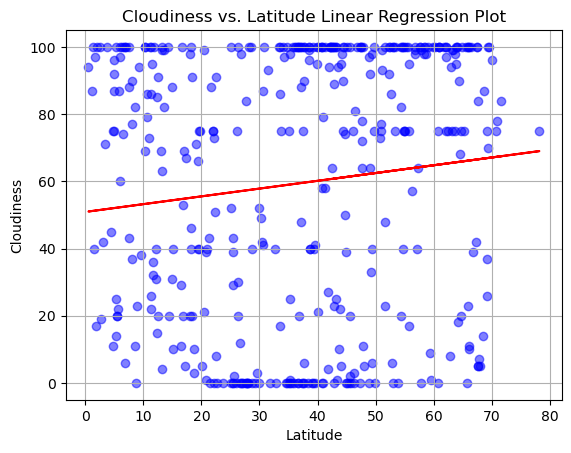

Equation of the linear regression line: y = 0.23x + 50.89
The r-value is: 0.1157309254614239


In [59]:
# Northern Hemisphere
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)


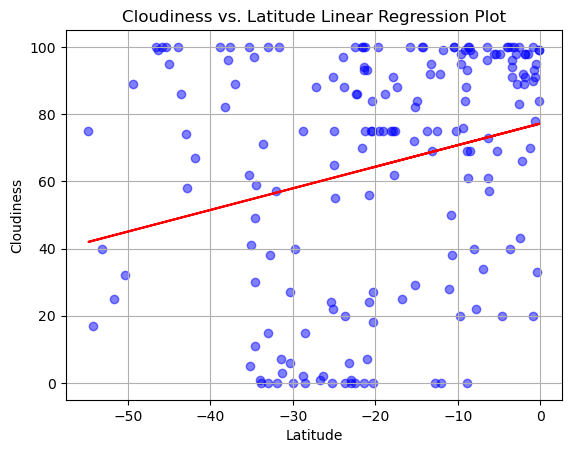

Equation of the linear regression line: y = 0.64x + 77.19
The r-value is: 0.2518489215925734


In [60]:
# Southern Hemisphere
# Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)


**Discussion about the linear relationship:** Both hemispheres exhibit weak positive correlations between Cloudiness and Latitude, indicating that Latitude has limited predictive power for Cloudiness levels. 

### Wind Speed vs. Latitude Linear Regression Plot

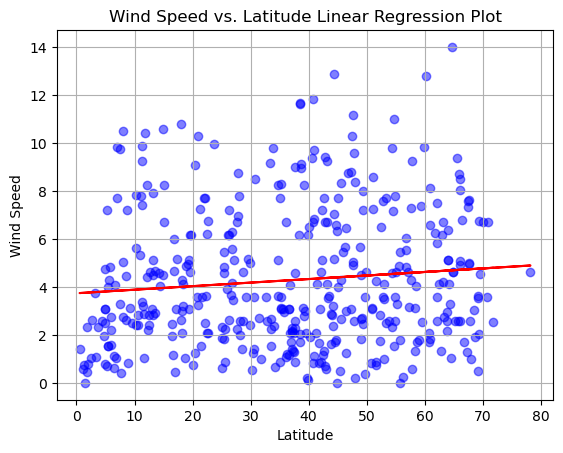

Equation of the linear regression line: y = 0.01x + 3.74
The r-value is: 0.10206427449113895


In [61]:
# Northern Hemisphere
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)


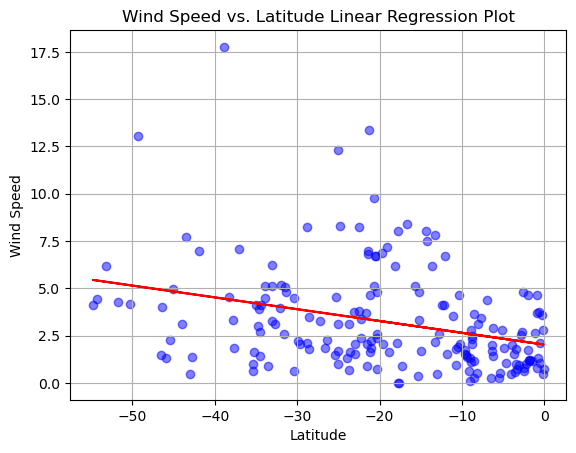

Equation of the linear regression line: y = -0.06x + 2.02
The r-value is: -0.31965825862327607


In [62]:
# Southern Hemisphere
# Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')

# Add labels and title
plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Show plot
plt.show()

# Equation of the linear regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print("Equation of the linear regression line:", equation)

# r-value
print("The r-value is:", r_value)

**Discussion about the linear relationship:** Both hemispheres exhibit weak correlations between Wind Speed and Latitude, with different directions of correlation. However, the correlations are relatively weak in both cases, suggesting that Latitude alone may not be a strong predictor of Wind Speed. 